## Classification

![](https://dl.dropboxusercontent.com/u/75194/images/onelinesplit.png)

### Risk for Classification


For regression we can use $l = (g-y)^2$ and for classification we usually use the 1-0 loss $l = \mathbb{1}_{g \ne y}$.

 Notice that $g$ here is an action. By this we mean that its not the probabilty estimation function. It can be the prediction function. (while in regression g is the approximating function here it is just a map conveniently giving us 0's and 1's. We can even generalize to actions not in the set of possible classifications. 

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [2]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [3]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


def points_plot2(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    plt.figure(figsize=(10,6))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return plt.gca()

###The ATM Camera example

In [4]:
#wget https://dl.dropboxusercontent.com/u/75194/imag.pix.npy
#wget https://dl.dropboxusercontent.com/u/75194/imag.lbl.npy
data=np.load("./imag.pix.npy")
y=np.load("./imag.lbl.npy")
STANDARD_SIZE = (322, 137)
data.shape, y.shape

((87, 132342), (87,))

In [5]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
    rgbArray = np.zeros((137,322,3), 'uint8')
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    return rgbArray

def display_image(mat):
    with sns.axes_style("white"):
        plt.imshow(get_image(mat))
        plt.xticks([])
        plt.yticks([])

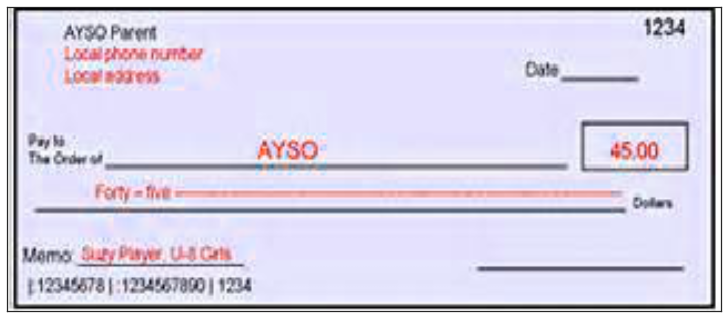

In [6]:
display_image(data[5])

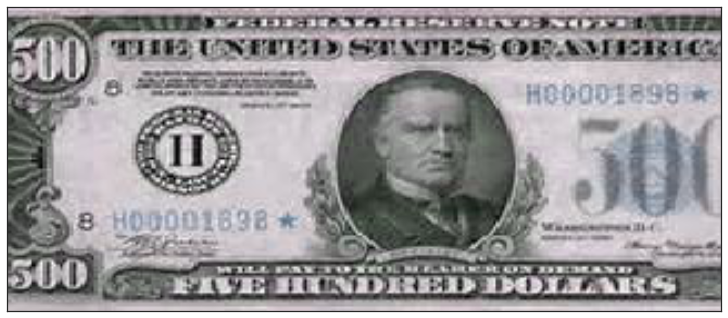

In [7]:
display_image(data[50])

### The curse of dimensionality: Feature engineering

In [8]:
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.neighbors import KNeighborsClassifier
pca = PCA(n_components=90)
X = pca.fit_transform(data)
print pca.explained_variance_ratio_.sum()

1.0


//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [9]:
pca.explained_variance_ratio_*100

array([  3.59259670e+01,   6.29318801e+00,   4.10778347e+00,
         3.11950952e+00,   2.81695972e+00,   2.28831619e+00,
         2.10127949e+00,   1.87404975e+00,   1.73264637e+00,
         1.53023773e+00,   1.42159671e+00,   1.31839400e+00,
         1.24701539e+00,   1.16381841e+00,   1.09958324e+00,
         1.06073157e+00,   1.00743046e+00,   9.80238686e-01,
         9.60559476e-01,   9.15358563e-01,   9.01856121e-01,
         8.52133092e-01,   8.36745802e-01,   7.96923559e-01,
         7.54898462e-01,   7.25055618e-01,   7.08217814e-01,
         6.79676505e-01,   6.60925346e-01,   6.47720843e-01,
         6.27392325e-01,   5.94773441e-01,   5.83031014e-01,
         5.74509258e-01,   5.72781865e-01,   5.52617340e-01,
         5.38587174e-01,   5.33431908e-01,   5.16657087e-01,
         4.93431824e-01,   4.85945647e-01,   4.77622358e-01,
         4.72841943e-01,   4.56200174e-01,   4.44170760e-01,
         4.40044935e-01,   4.34603899e-01,   4.28003832e-01,
         4.21957330e-01,

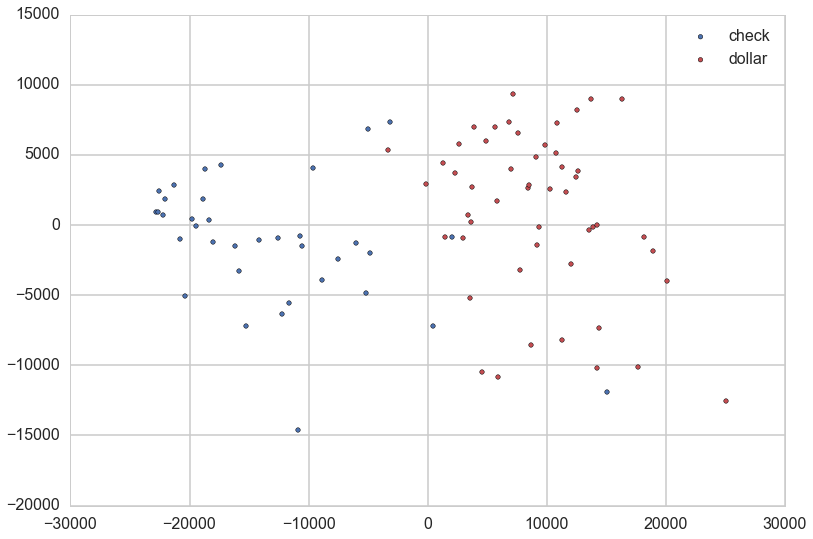

In [10]:
df = pd.DataFrame({"pc1": X[:, 0], "pc2": X[:, 1], "y":y, "label":np.where(y==1, "check", "dollar")})
colors = [c0, c2]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
plt.legend()

In [12]:
np.mean(df.label=="dollar")

0.58620689655172409

In [13]:
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=322*137*3
    r=pc.components_[j][0:size:3]
    g=pc.components_[j][1:size:3]
    b=pc.components_[j][2:size:3]
    r=normit(r)
    g=normit(g)
    b=normit(b)
    return r,g,b
def display_component(pc, j):
    r,g,b = getNC(pc,j)
    rgbArray = np.zeros((137,322,3), 'uint8')
    rgbArray[..., 0] = r.reshape(137,322)
    rgbArray[..., 1] = g.reshape(137,322)
    rgbArray[..., 2] = b.reshape(137,322)
    plt.imshow(rgbArray)
    plt.xticks([])
    plt.yticks([])

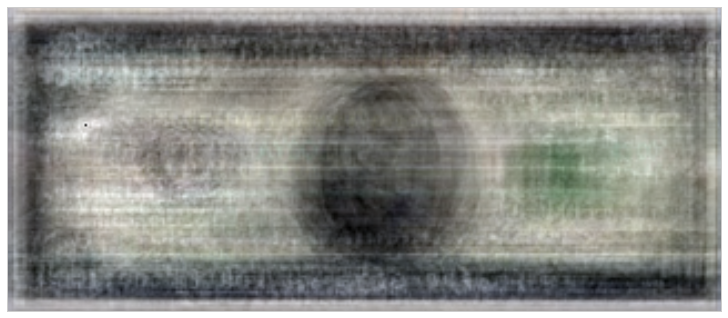

In [14]:
display_component(pca,0)

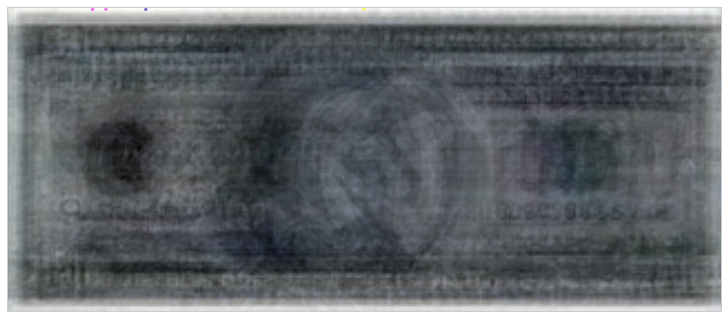

In [15]:
display_component(pca,1)

###Classifying in a reduced feature space with kNN

![](https://dl.dropboxusercontent.com/u/75194/images/bookimages/knn1.png)

In [18]:
from sklearn.cross_validation import train_test_split
ys=df['y'].astype(int).values
subdf=df[['pc1','pc2']]
subdfstd=(subdf - subdf.mean())/subdf.std()
Xs=subdfstd.values
def classify(X,y, nbrs, plotit=True, train_size=0.6):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf= KNeighborsClassifier(nbrs)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    Xall=np.concatenate((Xtrain, Xtest))
    if plotit:
        print "Accuracy on training data: %0.2f" % (training_accuracy)
        print "Accuracy on test data:     %0.2f" % (test_accuracy)
        points_plot2(Xall, Xtrain, Xtest, ytrain, ytest, clf)
    return nbrs, training_accuracy, test_accuracy

Accuracy on training data: 1.00
Accuracy on test data:     0.91


(1, 1.0, 0.91428571428571426)

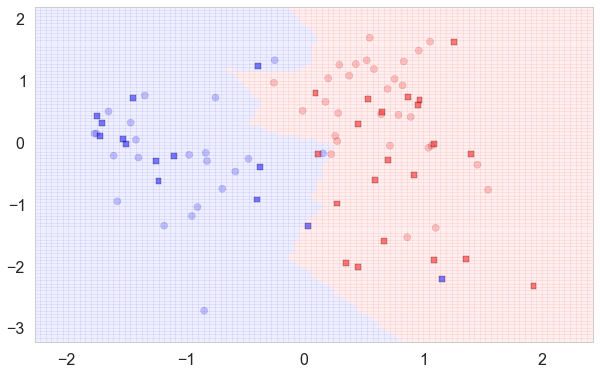

In [19]:
classify(Xs,ys,1)

Accuracy on training data: 0.62
Accuracy on test data:     0.54


(40, 0.61538461538461542, 0.54285714285714282)

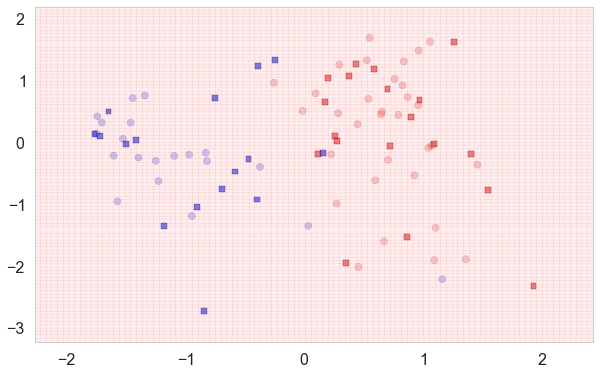

In [20]:
classify(Xs,ys,40)#run this a few times

Accuracy on training data: 0.94
Accuracy on test data:     0.94


(17, 0.94230769230769229, 0.94285714285714284)

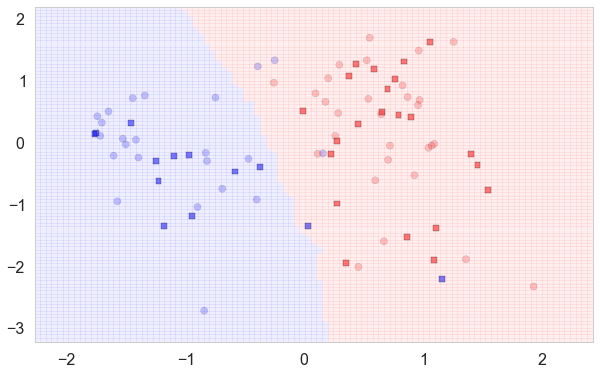

In [21]:
classify(Xs,ys,17)

![](https://dl.dropboxusercontent.com/u/75194/images/bookimages/knn2.png)

###Learning Curves (against complexity)

In [22]:
fits={}
for k in np.arange(1,45,1):
    fits[k]=[]
    for i in range(200):
        fits[k].append(classify(Xs, ys,k, False))
nbrs=np.arange(1,45,1)
fmeanstr = np.array([1.-np.mean([t[1] for t in fits[e]]) for e in nbrs])
fmeanste = np.array([1.-np.mean([t[2] for t in fits[e]]) for e in nbrs])
fstdsstr = np.array([np.std([t[1] for t in fits[e]]) for e in nbrs])
fstdsste = np.array([np.std([t[2] for t in fits[e]]) for e in nbrs])

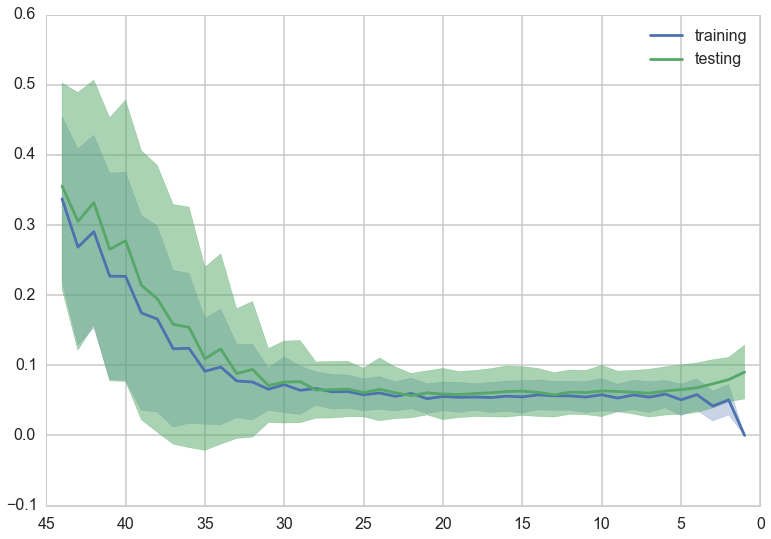

In [23]:
plt.gca().invert_xaxis()
plt.plot(nbrs, fmeanstr, color=c0, label="training");
plt.fill_between(nbrs, fmeanstr - fstdsstr, fmeanstr+fstdsstr, color=c0, alpha=0.3)
plt.plot(nbrs, fmeanste, color=c1, label="testing");
plt.fill_between(nbrs, fmeanste - fstdsste, fmeanste+fstdsste, color=c1, alpha=0.5)

plt.legend();

In [24]:
from sklearn.grid_search import GridSearchCV
def cv_optimize_knn(X, y, n_folds=10):
    clf = KNeighborsClassifier()
    parameters = {"n_neighbors": range(1,40,1)}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xs, ys, train_size=0.8)
bestcv = cv_optimize_knn(Xtrain, ytrain)

BEST {'n_neighbors': 5} 0.942028985507 [mean: 0.91304, std: 0.09639, params: {'n_neighbors': 1}, mean: 0.91304, std: 0.10672, params: {'n_neighbors': 2}, mean: 0.91304, std: 0.10672, params: {'n_neighbors': 3}, mean: 0.92754, std: 0.10672, params: {'n_neighbors': 4}, mean: 0.94203, std: 0.07265, params: {'n_neighbors': 5}, mean: 0.94203, std: 0.07265, params: {'n_neighbors': 6}, mean: 0.94203, std: 0.07265, params: {'n_neighbors': 7}, mean: 0.94203, std: 0.07265, params: {'n_neighbors': 8}, mean: 0.94203, std: 0.07265, params: {'n_neighbors': 9}, mean: 0.94203, std: 0.07265, params: {'n_neighbors': 10}, mean: 0.94203, std: 0.07265, params: {'n_neighbors': 11}, mean: 0.94203, std: 0.07265, params: {'n_neighbors': 12}, mean: 0.94203, std: 0.07265, params: {'n_neighbors': 13}, mean: 0.94203, std: 0.07265, params: {'n_neighbors': 14}, mean: 0.94203, std: 0.07265, params: {'n_neighbors': 15}, mean: 0.94203, std: 0.07265, params: {'n_neighbors': 16}, mean: 0.94203, std: 0.07265, params: {'n_

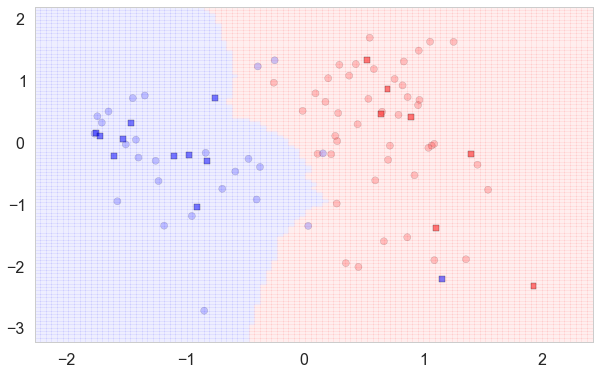

In [26]:
points_plot2(Xs, Xtrain, Xtest, ytrain, ytest, bestcv)

###Evaluation

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(bestcv.predict(Xtest), ytest)

array([[ 7,  1],
       [ 0, 10]])

In [28]:
print classification_report(bestcv.predict(Xtest), ytest)

             precision    recall  f1-score   support

          0       1.00      0.88      0.93         8
          1       0.91      1.00      0.95        10

avg / total       0.95      0.94      0.94        18



In [49]:
df.head()

,label,pc1,pc2,y
0,check,-22536.362571,2428.343967,1
1,check,-22226.658684,709.255778,1
2,check,-17364.260784,4252.027148,1
3,check,-22847.256199,900.591903,1
4,check,-15868.672595,-3259.491423,1


In [11]:
df.to_csv("pcs.csv", header=True)

###Other classifiers

![](https://dl.dropboxusercontent.com/u/75194/images/linsep.png)

####Italian Olives

![](https://dl.dropboxusercontent.com/u/75194/BDF/Italy.png)

I found this data set in the RGGobi book (http://www.ggobi.org/book/), from which the above diagram is taken. It has "the percentage composition of fatty acids
found in the lipid fraction of Italian olive oils', with oils from 3 regions of Italy: the North, the South, and Sardinia. The regions themselves are subdivided into areas as shown in the map above. The source for this data is:

>Forina, M., Armanino, C., Lanteri, S. & Tiscornia, E. (1983), Classification of Olive Oils from their Fatty Acid Composition, in Martens, H. and
Russwurm Jr., H., eds, Food Research and Data Analysis, Applied Science
Publishers, London, pp. 189–214.

In [29]:
dfolives=pd.read_csv("https://dl.dropboxusercontent.com/u/75194/olives-cleaned.csv")
dfolives.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,regionstring
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29,South
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29,South
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29,South
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35,South
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46,South


In [30]:
dfnosouth=dfolives[dfolives.regionstring!='South']
dfnosouth.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,regionstring
323,Inland-Sardinia,2,5,11.29,1.20,2.22,72.72,11.12,0.43,0.98,0.02,Sardinia
324,Inland-Sardinia,2,5,10.42,1.35,2.10,73.76,11.16,0.35,0.90,0.03,Sardinia
325,Inland-Sardinia,2,5,11.03,0.96,2.10,73.80,10.85,0.32,0.94,0.03,Sardinia
326,Inland-Sardinia,2,5,11.18,0.97,2.21,72.79,11.54,0.35,0.94,0.02,Sardinia
327,Inland-Sardinia,2,5,10.52,0.95,2.15,73.88,11.26,0.31,0.92,0.01,Sardinia


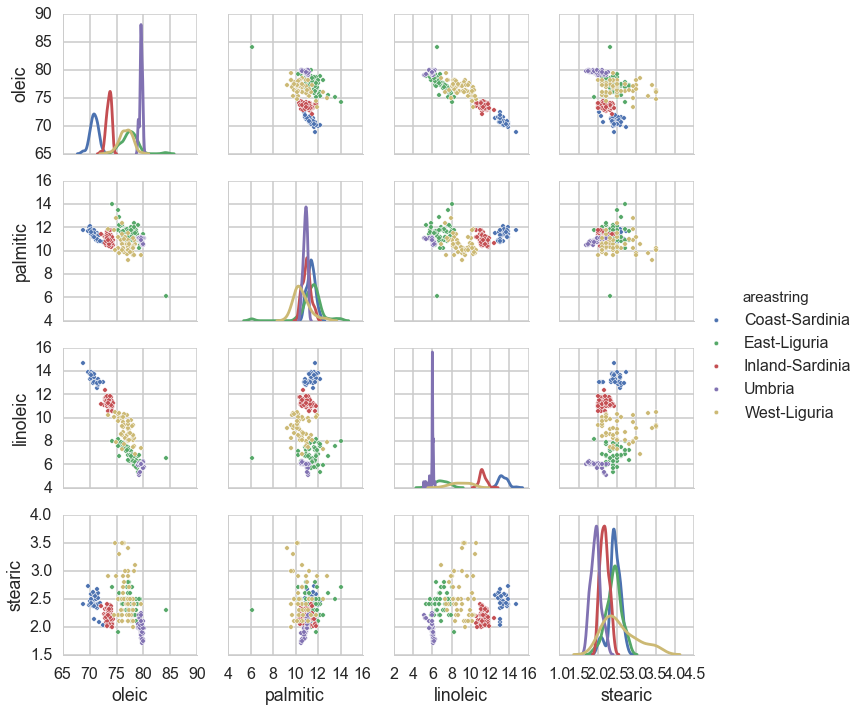

In [31]:
sns.pairplot(dfnosouth, hue="areastring", size=2.5, vars=['oleic','palmitic', 'linoleic', 'stearic'], diag_kind='kde');

In [36]:
def cv_optimize(clf, parameters, X, y, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

In [37]:
def do_classify(clf, parameters, indf, inacidlist, clon, clonval, train_size=0.6):
    subdf=indf[inacidlist]
    subdfstd=(subdf - subdf.mean())/subdf.std()
    X=subdfstd.values
    y=(indf[clon].values==clonval)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    return clf, Xtrain, ytrain, Xtest, ytest

BEST {'n_neighbors': 2} 0.993288590604 [mean: 0.98658, std: 0.02667, params: {'n_neighbors': 1}, mean: 0.99329, std: 0.01333, params: {'n_neighbors': 2}, mean: 0.99329, std: 0.01333, params: {'n_neighbors': 3}, mean: 0.99329, std: 0.01333, params: {'n_neighbors': 4}, mean: 0.98658, std: 0.01633, params: {'n_neighbors': 5}, mean: 0.99329, std: 0.01333, params: {'n_neighbors': 6}, mean: 0.98658, std: 0.01633, params: {'n_neighbors': 7}, mean: 0.98658, std: 0.01633, params: {'n_neighbors': 8}, mean: 0.97987, std: 0.02667, params: {'n_neighbors': 9}, mean: 0.97987, std: 0.02667, params: {'n_neighbors': 10}, mean: 0.96644, std: 0.04216, params: {'n_neighbors': 11}, mean: 0.96644, std: 0.04216, params: {'n_neighbors': 12}, mean: 0.95973, std: 0.03887, params: {'n_neighbors': 13}, mean: 0.95973, std: 0.03887, params: {'n_neighbors': 14}, mean: 0.94631, std: 0.02650, params: {'n_neighbors': 15}, mean: 0.94631, std: 0.02650, params: {'n_neighbors': 16}, mean: 0.94631, std: 0.02650, params: {'n_

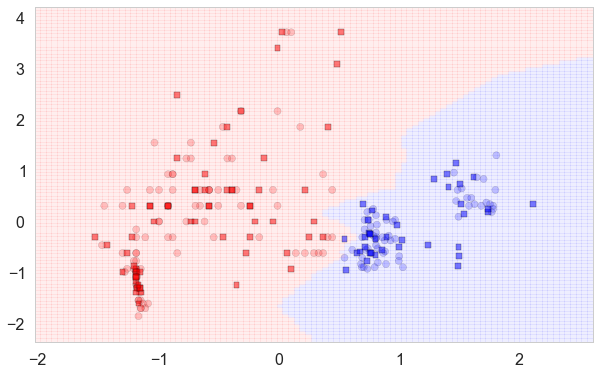

In [38]:
clf = KNeighborsClassifier()
parameters = {"n_neighbors": range(1,40,1)}
clfknn, Xtrain, ytrain, Xtest, ytest=do_classify(clf, parameters, dfnosouth, ['linoleic','stearic'],'regionstring', "Sardinia")
#clfknn, Xtrain, ytrain, Xtest, ytest=classify_knn(dfnosouth, ['linoleic','arachidic'],'regionstring', "Sardinia")
Xtr=np.concatenate((Xtrain, Xtest))
points_plot2(Xtr, Xtrain, Xtest, ytrain, ytest, clfknn)

BEST {'C': 100} 1.0 [mean: 0.95302, std: 0.02714, params: {'C': 0.01}, mean: 0.94631, std: 0.03432, params: {'C': 0.1}, mean: 0.95973, std: 0.02551, params: {'C': 1}, mean: 0.98658, std: 0.01633, params: {'C': 10}, mean: 1.00000, std: 0.00000, params: {'C': 100}]
Accuracy on training data: 1.00
Accuracy on test data:     1.00


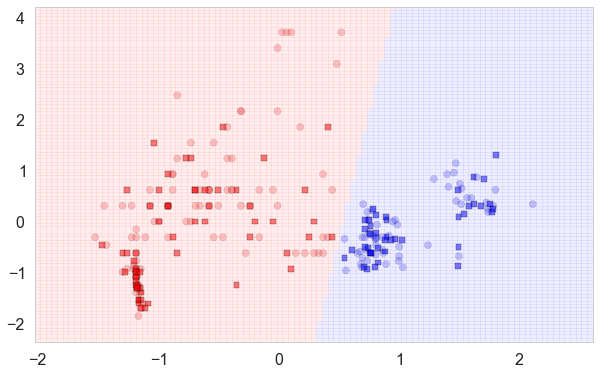

In [41]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
parameters = {"C": [0.01, 0.1, 1, 10, 100]}
clflog, Xtrain, ytrain, Xtest, ytest=do_classify(clf, parameters, dfnosouth, ['linoleic','stearic'],'regionstring', "Sardinia")
Xtr=np.concatenate((Xtrain, Xtest))
points_plot2(Xtr, Xtrain, Xtest, ytrain, ytest, clflog)

###SVM

This is the notion of maximum margin, sometimes coupled with a dimension increasing!! notion of a kernel.

![max margin](https://dl.dropboxusercontent.com/u/75194/BDF/svm.png) 
The idea is to draw a line in space between the classes. But not any line, but the line which gives the `maximum margin` rectangle between points of different classes.

from Jesse Johnson's excellent Shape of Data;
http://shapeofdata.wordpress.com/2013/05/14/linear-separation-and-support-vector-machines/

But what if the separability is not so simple, and there are points intruding?

![intrusion](https://dl.dropboxusercontent.com/u/75194/BDF/svm21.png)

Then the idea is to minimize the distance of the "crossed over" points from the separating line. These crossed over points are costed using "slack" vectors. You dont want too many of these.

You obtain the line my minimizing the [Hinge Loss](http://en.wikipedia.org/wiki/Hinge_loss)

In [42]:
from sklearn.svm import SVC # "Support Vector Classifier"
#From Jake Vanderplas's ESAC notebook
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    return ax.contour(X, Y, P, colors='k',
                      levels=[-1, 0, 1], alpha=0.5,
                      linestyles=['--', '-', '--'])

In [45]:
clf = SVC(kernel="linear", probability=True)
parameters = {"C": np.logspace(-4, 3, num=50)}
thesvcfit, Xtr, ytr, Xte, yte = do_classify(clf, parameters, dfnosouth, ['linoleic','stearic'],'regionstring', "Sardinia")

BEST {'C': 2.6826957952797219} 1.0 [mean: 0.59060, std: 0.00793, params: {'C': 0.0001}, mean: 0.59060, std: 0.00793, params: {'C': 0.00013894954943731373}, mean: 0.59060, std: 0.00793, params: {'C': 0.00019306977288832496}, mean: 0.59060, std: 0.00793, params: {'C': 0.00026826957952797245}, mean: 0.59060, std: 0.00793, params: {'C': 0.00037275937203149379}, mean: 0.59060, std: 0.00793, params: {'C': 0.0005179474679231213}, mean: 0.59060, std: 0.00793, params: {'C': 0.00071968567300115217}, mean: 0.59060, std: 0.00793, params: {'C': 0.001}, mean: 0.59060, std: 0.00793, params: {'C': 0.0013894954943731374}, mean: 0.59060, std: 0.00793, params: {'C': 0.0019306977288832496}, mean: 0.59060, std: 0.00793, params: {'C': 0.0026826957952797246}, mean: 0.59060, std: 0.00793, params: {'C': 0.0037275937203149379}, mean: 0.67114, std: 0.05082, params: {'C': 0.0051794746792312128}, mean: 0.92617, std: 0.03785, params: {'C': 0.0071968567300115137}, mean: 0.97315, std: 0.01336, params: {'C': 0.01}, me

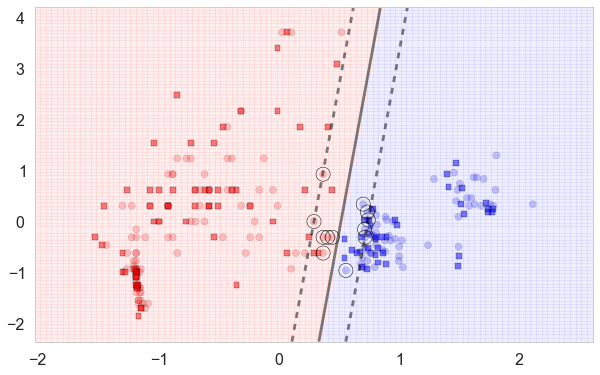

In [46]:
Xtot=np.concatenate((Xtr, Xte))
ax=points_plot2(Xtot, Xtr, Xte, ytr, yte, thesvcfit)
plot_svc_decision_function(thesvcfit, ax)
ax.scatter(thesvcfit.support_vectors_[:, 0], thesvcfit.support_vectors_[:, 1],
                s=200, facecolors='none')

Often in SVMs one uses the [kernel trick](http://en.wikipedia.org/wiki/Kernel_method), which maps a lower dimension to a higher one to make things separable.

See (from http://nlp.stanford.edu/IR-book/html/htmledition/support-vector-machines-the-linearly-separable-case-1.html)

![](https://dl.dropboxusercontent.com/u/75194/BDF/img1331.png)

So lets see what using a Radial Gaussian kernel look like?

$$e^{-\gamma d(x_1,x_2)^2}$$


BEST {'C': 2.6826957952797219} 1.0 [mean: 0.61074, std: 0.00931, params: {'C': 0.0001}, mean: 0.61074, std: 0.00931, params: {'C': 0.00013894954943731373}, mean: 0.61074, std: 0.00931, params: {'C': 0.00019306977288832496}, mean: 0.61074, std: 0.00931, params: {'C': 0.00026826957952797245}, mean: 0.61074, std: 0.00931, params: {'C': 0.00037275937203149379}, mean: 0.61074, std: 0.00931, params: {'C': 0.0005179474679231213}, mean: 0.61074, std: 0.00931, params: {'C': 0.00071968567300115217}, mean: 0.61074, std: 0.00931, params: {'C': 0.001}, mean: 0.61074, std: 0.00931, params: {'C': 0.0013894954943731374}, mean: 0.61074, std: 0.00931, params: {'C': 0.0019306977288832496}, mean: 0.61074, std: 0.00931, params: {'C': 0.0026826957952797246}, mean: 0.61074, std: 0.00931, params: {'C': 0.0037275937203149379}, mean: 0.61074, std: 0.00931, params: {'C': 0.0051794746792312128}, mean: 0.61074, std: 0.00931, params: {'C': 0.0071968567300115137}, mean: 0.61074, std: 0.00931, params: {'C': 0.01}, me

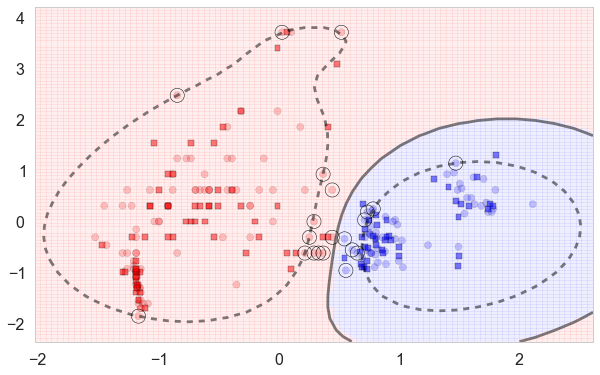

In [48]:
clf = SVC(kernel="rbf", probability=True)
parameters = {"C": np.logspace(-4, 3, num=50)}
thesvcfit, Xtr, ytr, Xte, yte = do_classify(clf, parameters, dfnosouth, ['linoleic','stearic'],'regionstring', "Sardinia")
Xtot=np.concatenate((Xtr, Xte))
ax=points_plot2(Xtot, Xtr, Xte, ytr, yte, thesvcfit)
plot_svc_decision_function(thesvcfit, ax)
ax.scatter(thesvcfit.support_vectors_[:, 0], thesvcfit.support_vectors_[:, 1],
                s=200, facecolors='none')